<img style="float: right" src="https://upload.wikimedia.org/wikipedia/de/thumb/7/7b/DWD-Logo_2013.svg/500px-DWD-Logo_2013.svg.png" />

# Unzip bz2 files

In [1]:
import bz2
import glob

In [2]:
# extract data that was downloaded from https://opendata.dwd.de/weather/nwp/icon-eu/
path = "/shared/eduard"
for filename in glob.glob("{}/*.bz2".format(path)):
    print (filename)
    with bz2.open(filename, "rb") as f:
        # Decompress data from file
        outfilename = filename.split(".bz2")[0]
        with open(outfilename, 'wb') as out:
            out.write(f.read())
            print ("-> {}".format(outfilename))


In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask

# read dwd grib data from local directory
path = "/shared/eduard"
# lazy load using dask
x = xr.open_mfdataset("{}/icon-eu_*.grib2".format(path), engine='cfgrib', concat_dim="valid_time", combine="nested")
x = x - 273.15

In [4]:
# display info
x.info()

xarray.Dataset {
dimensions:
	latitude = 657 ;
	longitude = 1097 ;
	valid_time = 4 ;

variables:
	int64 heightAboveGround() ;
		heightAboveGround:long_name = height above the surface ;
		heightAboveGround:units = m ;
		heightAboveGround:positive = up ;
		heightAboveGround:standard_name = height ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
	datetime64[ns] time() ;
		time:long_name = initial time of forecast ;
		time:standard_name = forecast_reference_time ;
	datetime64[ns] valid_time(valid_time) ;
		valid_time:standard_name = time ;
		valid_time:long_name = time ;
	timedelta64[ns] step(valid_time) ;
		step:long_name = time since forecast_reference_time ;
		step:standard_name = forecast_period ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
	float32 t2m(valid_time, latitude, longitude) ;

// global a

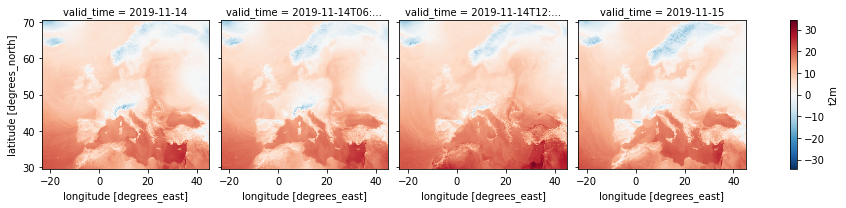

In [5]:
# Plotting xarray https://xarray.pydata.org/en/v0.7.1/plotting.html
# plot 3 dimensional, optionally: wrap after 2 plots
x.t2m.plot(x="longitude", y="latitude", col="valid_time") #, col_wrap=2)